In [1]:
import pickle
import jax.numpy as jnp
import jax
jax.config.update('jax_enable_x64',True)
jax.config.update('jax_default_device',jax.devices()[0])

import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
f1_vals = {}
l2_error = {}

file_paths = list(pathlib.Path('results').glob("*.pkl"))
def get_properties(path):
	pieces = str(path).split('_')
	run = pieces[2]
	seed_val = pieces[0][-1]
	noise_level = pieces[5]
	time_length = pieces[-1][:-4]
	return run,seed_val,float(noise_level),float(time_length)

for pkl_file in file_paths:
	run,seed_val,noise,length = get_properties(str(pkl_file))
	with open(pkl_file, 'rb') as file:
		results = pickle.load(file)
		f1_vals[(run,seed_val,noise,length)] = results['coeff_mets']['f1']
		l2_error[(run,seed_val,noise,length)] = results['coeff_mets']['coeff_rel_l2']

In [33]:
# df_f1 = pd.DataFrame(
# 	{(run,seed_val,noise, length): val for (run,seed_val,noise, length), val in f1_vals.items()},
# 	index=[0]
# ).T.reset_index()
# df_f1.columns = ['run','seed_val','noise', 'length', 'f1']
# df_f1['recovered'] = (df_f1['f1']==1).astype('int')
# df_f1.groupby(['noise','length'])['recovered'].mean()
# # df_f1 = df_f1.pivot(index='noise', columns='length', values='f1')

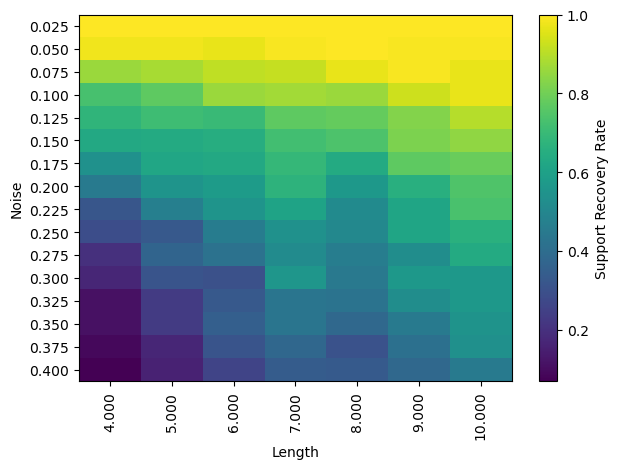

In [34]:
df_f1 = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','seed','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
# df_f1.groupby(['noise','length'])['recovered'].mean()
df_f1.sort_values(['length','noise','run','seed'])

df_recovery = df_f1.groupby(['noise','length'])['recovered'].mean().unstack(level = 'length')

df_f1 = df_f1.groupby(['noise','length'])['f1'].mean().unstack(level = 'length')

df_recovery = df_recovery.loc[::-1]
plt.imshow(df_recovery, aspect='auto', origin='lower')
plt.colorbar(label='Support Recovery Rate')
plt.xticks(ticks=np.arange(len(df_recovery.columns)), labels=[f"{col:.3f}" for col in df_recovery.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_recovery.index)), labels=[f"{idx:.3f}" for idx in df_recovery.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()

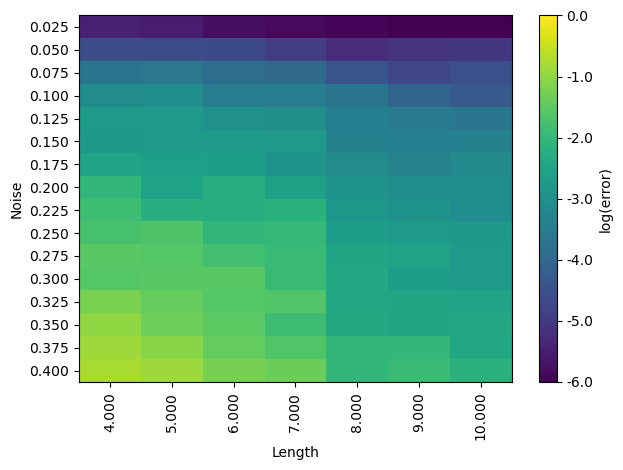

In [35]:
df_error = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','seed','noise', 'length', 'error']
df_error['error'] = np.minimum(df_error['error'],1.)

df_error = df_error.groupby(['noise','length'])['error'].mean()
df_error = df_error.unstack(level='length')
df_error = df_error.loc[::-1]

plt.imshow(np.log(df_error), aspect='auto', origin='lower', vmax=0,vmin = -6)
cbar = plt.colorbar(label='log(error)',ticks = np.arange(-6,0.1))
cbar.ax.set_yticklabels(np.arange(-6,0.1))
plt.xticks(ticks=np.arange(len(df_error.columns)), labels=[f"{col:.3f}" for col in df_error.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_error.index)), labels=[f"{idx:.3f}" for idx in df_error.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()

In [36]:
df_error = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','seed','noise', 'length', 'error']
df_error['error'] = np.minimum(df_error['error'],1.)


In [39]:
df_error.groupby(["noise","length"]).size()

noise  length
0.025  4.0       101
       5.0       100
       6.0       100
       7.0       100
       8.0       100
                ... 
0.400  6.0       100
       7.0       100
       8.0        99
       9.0        99
       10.0       97
Length: 112, dtype: int64